* [Train.csv] : https://www.kaggle.com/prachi13/customer-analytics


* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [ ]:
# import matplotlib.pyplot as plt

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic')

* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

#Part5. [실습4] 고객 데이터를 활용한 상품 배송 분석

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch06. [실습4] 고객 데이터를 활용한 상품 배송 분석" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

### 0. 데이터 불러오기

In [ ]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/강의/실습자료/data/ch6/Train.csv')
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# 데이터의 모양 알아보기
train.shape

(10999, 12)

### 1. 데이터 탐색

#### 1) 데이터 타입

In [ ]:
# 컬럼별 데이터 타입 알아보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#### 2) 데이터 통계값

In [ ]:
# 컬럼별 간단한 통계값 보기
train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### 3) 변수 간 관계 그래프

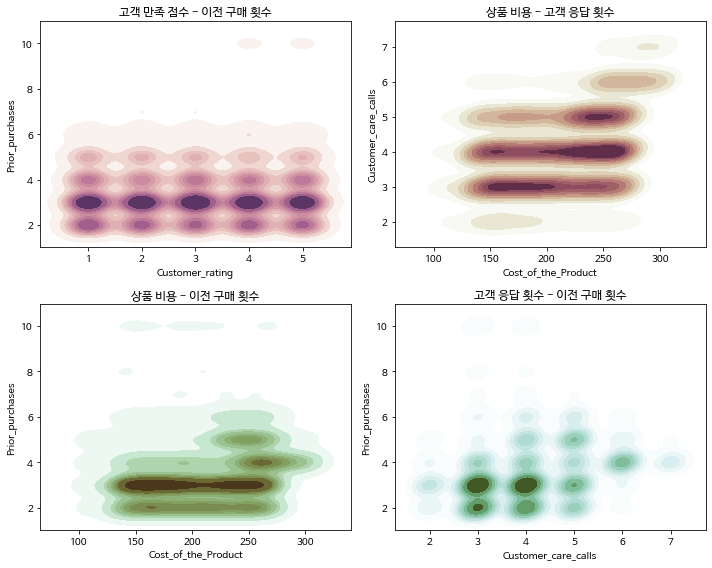

In [ ]:
# 여러 개의 KDE Plot 생성 준비
f, axes = plt.subplots(2, 2, figsize=(10, 8),
                       sharex=False, sharey=False)

# Plot 색상 설정
s = np.linspace(0, 3, 10)

# 1-1
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
x = train['Customer_rating']
y = train['Prior_purchases']
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,0])
axes[0,0].set( title = '고객 만족 점수 - 이전 구매 횟수')

# 1-2
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
x = train['Cost_of_the_Product']
y = train['Customer_care_calls']
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = '상품 비용 - 고객 응답 횟수')

# 2-1
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = train['Cost_of_the_Product']
y = train['Prior_purchases']
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = '상품 비용 - 이전 구매 횟수')

#2-2
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
x = train['Customer_care_calls']
y = train['Prior_purchases']
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = '고객 응답 횟수 - 이전 구매 횟수')

f.tight_layout()

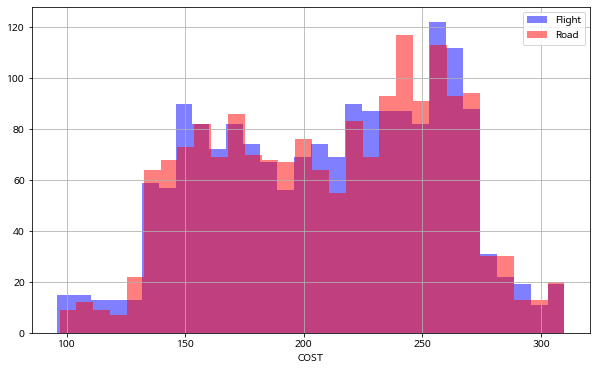

In [ ]:
plt.figure(figsize=(10,6))
train[train['Mode_of_Shipment']=='Flight']['Cost_of_the_Product'].hist(alpha=0.5,color='blue',bins=30,label='Flight')
train[train['Mode_of_Shipment']=='Road']['Cost_of_the_Product'].hist(alpha=0.5,color='red',bins=30,label='Road')
plt.xlabel('COST')
plt.legend()

#### 4) 결측값

In [ ]:
###### 코드 작성 부분 시작 ######

###### 코드 작성 부분 마침 ######

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

#### 5) 중복값

In [ ]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(train[train.duplicated()]))

중복된 항목 수 : 0


### 2. 데이터 전처리

#### 1) 데이터 컬럼명 수정

In [ ]:
train = train.rename(columns = {"Reached.on.Time_Y.N":"Reached_on_Time_Y_N"})

### 2. Target Feature 정의

#### 1) 데이터 탐색

In [ ]:
train.groupby('Reached_on_Time_Y_N').mean()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached_on_Time_Y_N,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104


In [ ]:
train.groupby('Reached_on_Time_Y_N').median()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached_on_Time_Y_N,,,,,,,
0,7096,4,3,222,3,6,4674
1,3467,4,3,209,3,9,3231


In [ ]:
y = train['Reached_on_Time_Y_N'].copy()
y.value_counts()

1    6563
0    4436
Name: Reached_on_Time_Y_N, dtype: int64

#### 2) 숫자형 변수들과의 관계

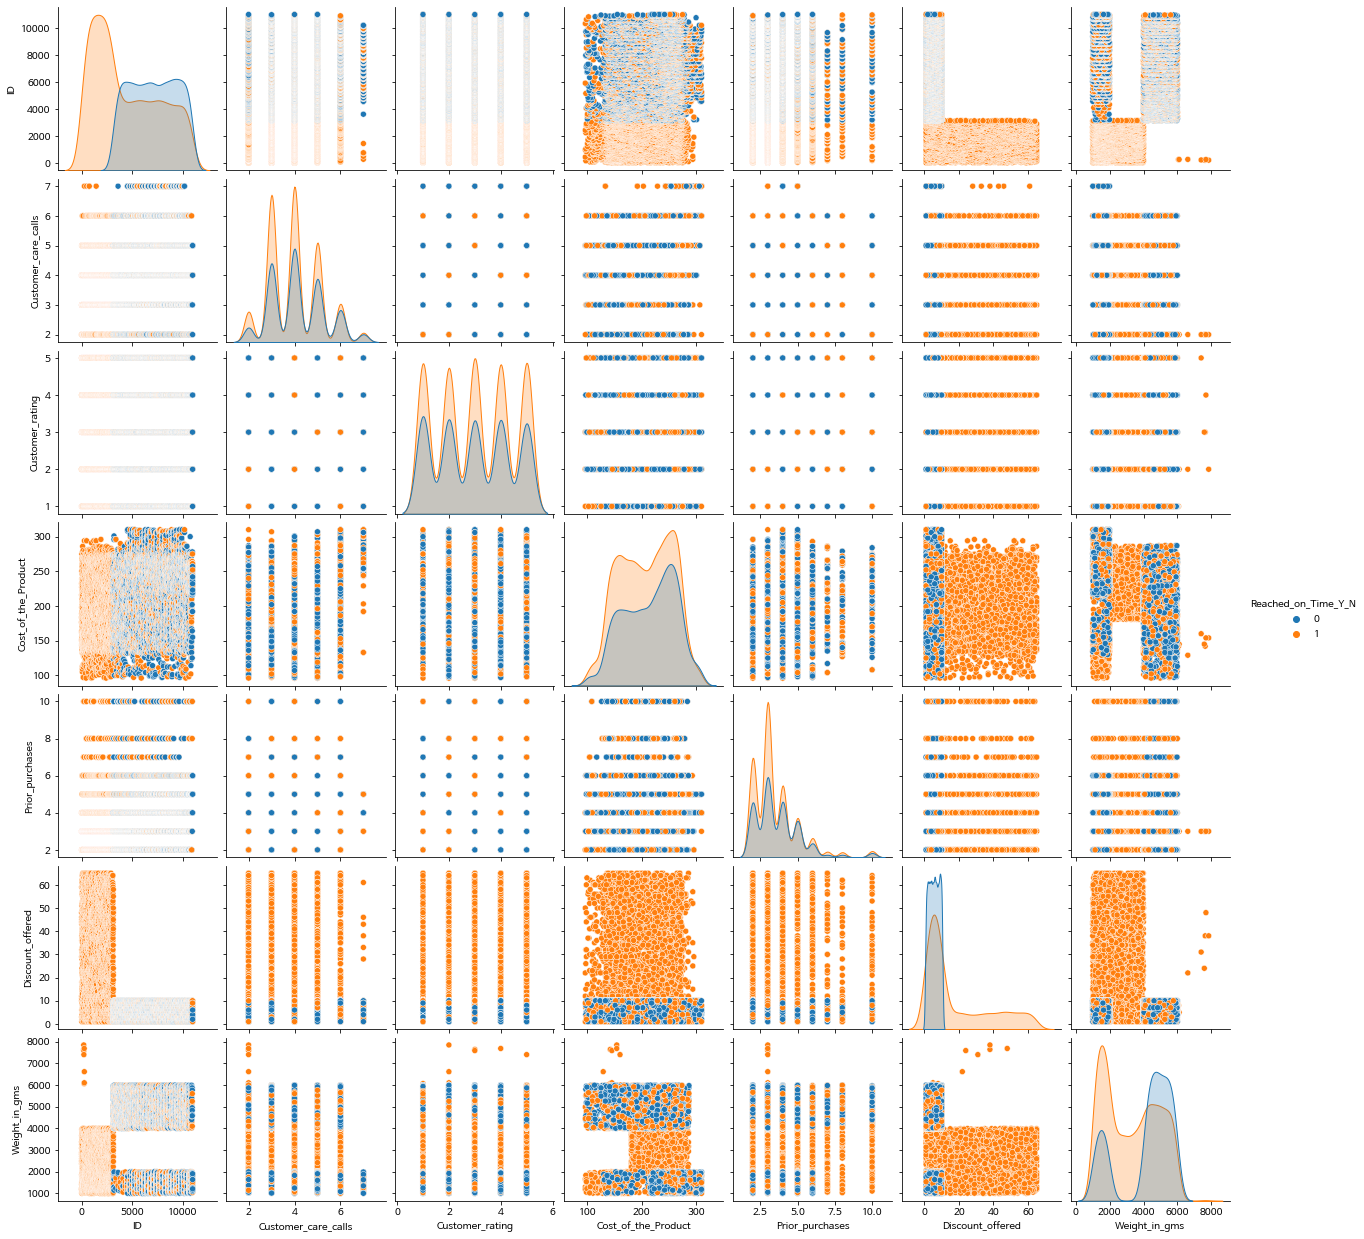

In [ ]:
hue = 'Reached_on_Time_Y_N'
sns.pairplot(train.select_dtypes(include=np.number), hue=hue)
plt.show()

#### 3) 각 변수별 Target Feature 그래프

> 이전 구매횟수 별 Target Feature

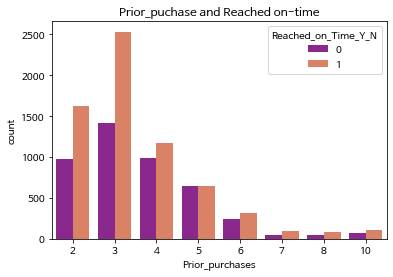

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Prior_purchases", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Prior_puchase and Reached on-time')
plt.show()

> 고객 평가 점수별 Target Feature

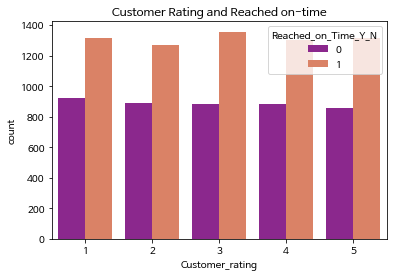

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Customer_rating", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Customer Rating and Reached on-time')
plt.show()

> 상품 중요도별 Target Feature

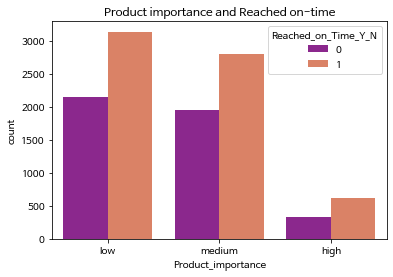

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Product_importance", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Product importance and Reached on-time')
plt.show()

> 성별에 따른 Target Feature

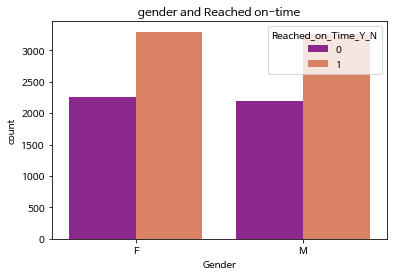

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Gender", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('gender and Reached on-time')
plt.show()

> 창고 구역별 Target Feature

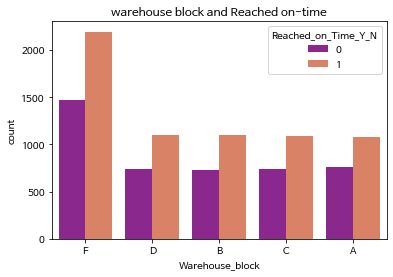

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Warehouse_block", data = train, palette = "plasma",hue="Reached_on_Time_Y_N",order = train['Warehouse_block'].value_counts().index);
plt.title('warehouse block and Reached on-time')
plt.show()

> 운송 수단별 Target Feature

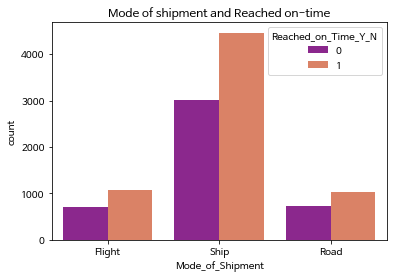

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Mode_of_Shipment", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Mode of shipment and Reached on-time')
plt.show()

> 고객 응답 횟수별 Target Feature

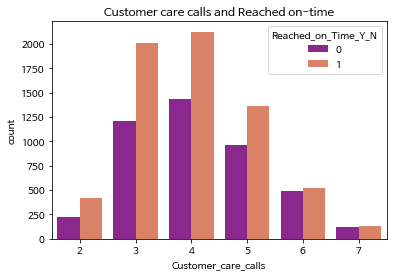

In [ ]:
sb.countplot(x = "Customer_care_calls", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Customer care calls and Reached on-time')
plt.show()

### 4. 데이터 타입별 Feature 변환

#### 1) Feature 탐색

##### 총 Feature 개수 확인

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time_Y_N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


##### Feature 데이터 타입별 개수 확인

In [ ]:
# 데이터 타입별 컬럼 수 확인
dtype_data = train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64      8
1      object      4


#### 2) 범주형 Feature
  * 데이터 확인
  * Feature 별 개수 시각화
  * 날짜/숫자/기간 등으로 변환해야 할 항목이 있는지 확인
  * Feature 별 개수 시각화
  * Feature 의 개수가 인코딩에 적합한가?

##### 데이터 확인

In [ ]:
# pandas 의 select_dtypes 사용
train.select_dtypes(include=['object','category']).head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


##### Feature 제거

> Feature 별 유일한 값 개수 확인

In [ ]:
cat_feat = train.select_dtypes('object','category').columns.values
train_cat = train[cat_feat].copy()
print(train_cat.nunique().sort_values())

Gender                2
Mode_of_Shipment      3
Product_importance    3
Warehouse_block       5
dtype: int64


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거한다
* Target Feature 가 포함되어 있으면 함께 제거

##### Feature 별 개수 시각화

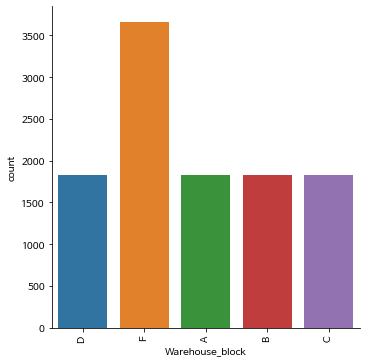

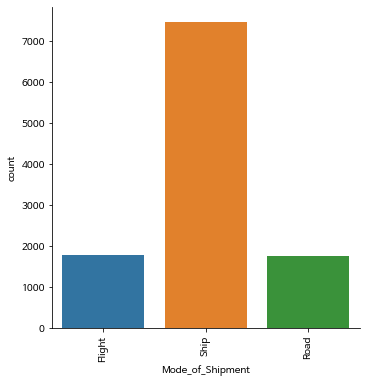

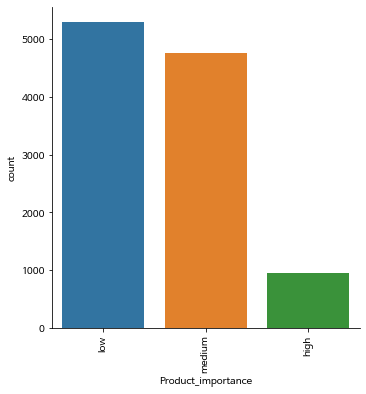

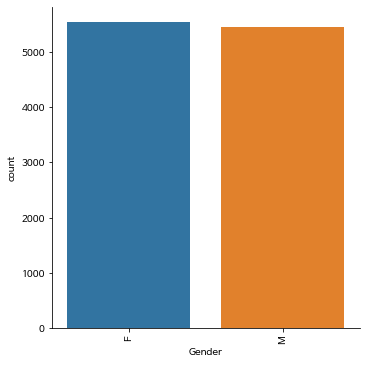

In [ ]:
for col in train_cat.columns:
  fig = sns.catplot(x=col, kind="count", data=train_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

##### Feature 의 개수가 인코딩에 적합한가?
  * 인코딩을 했을 경우 메모리 문제가 발생하지는 않는가?

> Feature 인코딩
* LabelEncoder : LabelEncoder 는 선형성을 가지는 머신러닝 기법에 쓰면 좋지 않다
* OneHotEncoder vs. get_dummies

In [ ]:
###### 코드 작성 부분 시작 ######
# pandas 의 get_dummies 활용
# train_at_dummies =
###### 코드 작성 부분 마침 ######
train_cat_dummies.head(3)

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1


#### 3) 숫자형 Feature
  * 데이터 확인
  * Feature 제거
  * Feature Skewness 확인

##### 데이터 확인

In [ ]:
# pandas 의 select_dtypes 사용
train.select_dtypes(include=['number']).head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [ ]:
train.select_dtypes(include=np.number).head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [ ]:
num_feat = train.select_dtypes('number').columns.values
train_num = train[num_feat].copy()

##### Feature 제거

> Feature 별 유일한 값 개수 확인

In [ ]:
###### 코드 작성 부분 시작 ######

###### 코드 작성 부분 마침 ######

Reached_on_Time_Y_N        2
Customer_rating            5
Customer_care_calls        6
Prior_purchases            8
Discount_offered          65
Cost_of_the_Product      215
Weight_in_gms           4034
ID                     10999
dtype: int64


In [ ]:
print(train.shape)

(10999, 12)


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거한다
* Target Feature 가 포함되어 있으면 함께 제거

In [ ]:
train_num = train_num.drop(['ID','Reached_on_Time_Y_N'], axis=1, errors='ignore')

##### Feature Skewness 확인

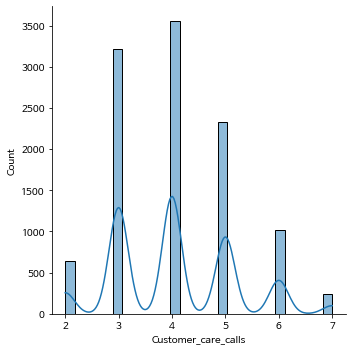

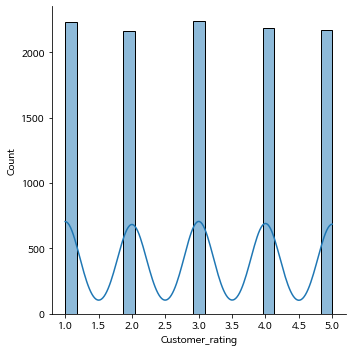

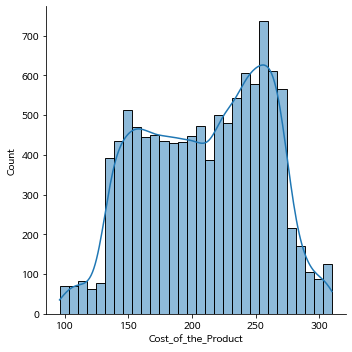

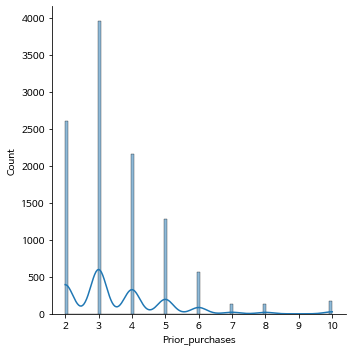

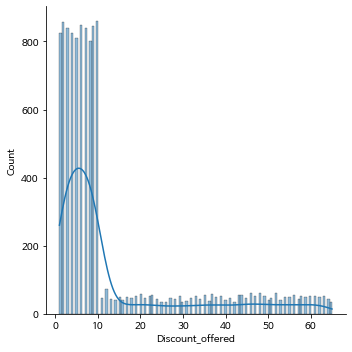

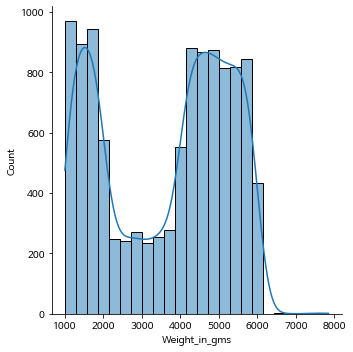

In [ ]:
col_attrition_num = train_num.columns.values
for i in range(0,len(col_attrition_num)):
    sns.displot(train_num[col_attrition_num[i]],kde=True) # kde : kernel density

### 5. 상관성에 따른 Feature 정제

#### 1) 숫자형 Feature
  * 데이터 확인
  * 숫자형 컬럼들 간 Pearson R 상관 계수를 구한다
  * 상관 계수가 0.9 이상인 컬럼들 중 가장 큰 컬럼을 제거해 본다
  * 컬럼들 간 조합 생성 : comb_num_feat = np.array(list(combinations(num_feat, 2)))
  * Pearson R 상관 계수 구하기 : pearsonr(x1, x2)[0]

##### 데이터 확인

In [ ]:
train_num.nunique().sort_values()

Customer_rating           5
Customer_care_calls       6
Prior_purchases           8
Discount_offered         65
Cost_of_the_Product     215
Weight_in_gms          4034
dtype: int64

##### 상관계수 구하기

* 방법 1

In [ ]:
num_feat = train_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(train_num[comb[0]], train_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [ ]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([], shape=(0, 2), dtype='<U19')

* 방법 2

In [ ]:
# plotly 안 보이는 문제 해결
import plotly.io as pio
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=train_num.astype(float).corr().values, # 피어슨 상관계수
        x=train_num.columns.values,
        y=train_num.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0

    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,

)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')



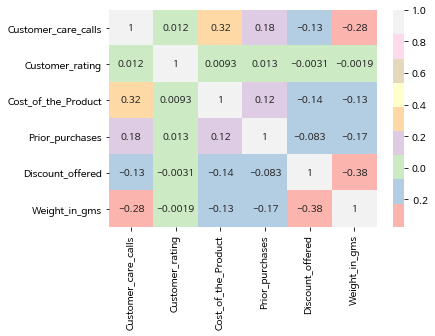

In [ ]:
sns.heatmap(train_num.corr(),annot=True,cmap='Pastel1')

#### 2) 범주형 Feature
  * 데이터 확인

##### 데이터 확인

In [ ]:
train_cat_dummies.nunique().sort_values()

Warehouse_block_A            2
Warehouse_block_B            2
Warehouse_block_C            2
Warehouse_block_D            2
Warehouse_block_F            2
Mode_of_Shipment_Flight      2
Mode_of_Shipment_Road        2
Mode_of_Shipment_Ship        2
Product_importance_high      2
Product_importance_low       2
Product_importance_medium    2
Gender_F                     2
Gender_M                     2
dtype: int64

In [ ]:
train_cat_dummies.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in train_cat_dummies:
  col = []
  for var2 in train_cat_dummies :
    cramers =cramers_V(train_cat_dummies[var1], train_cat_dummies[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = train_cat_dummies.columns, index =train_cat_dummies.columns)

df

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Warehouse_block_A,1.00,0.04,0.04,0.04,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Warehouse_block_B,0.04,1.00,0.04,0.04,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Warehouse_block_C,0.04,0.04,1.00,0.04,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Warehouse_block_D,0.04,0.04,0.04,1.00,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Warehouse_block_F,0.10,0.10,0.10,0.10,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Mode_of_Shipment_Flight,0.00,0.00,0.00,0.00,0.0,1.00,0.04,0.41,0.00,0.00,0.00,0.0,0.0
Mode_of_Shipment_Road,0.00,0.00,0.00,0.00,0.0,0.04,1.00,0.40,0.00,0.00,0.00,0.0,0.0
Mode_of_Shipment_Ship,0.00,0.00,0.00,0.00,0.0,0.41,0.40,1.00,0.00,0.00,0.00,0.0,0.0
Product_importance_high,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.09,0.07,0.0,0.0
Product_importance_low,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.09,1.00,0.71,0.0,0.0


In [ ]:
np.sum(df > 0.9)

Warehouse_block_A            1
Warehouse_block_B            1
Warehouse_block_C            1
Warehouse_block_D            1
Warehouse_block_F            1
Mode_of_Shipment_Flight      1
Mode_of_Shipment_Road        1
Mode_of_Shipment_Ship        1
Product_importance_high      1
Product_importance_low       1
Product_importance_medium    1
Gender_F                     2
Gender_M                     2
dtype: int64

In [ ]:
# Concat the two dataframes together columnwise
train_final = pd.concat([train["Reached_on_Time_Y_N"], train_num, train_cat_dummies], axis=1)

In [ ]:
train_final.head()

,Reached_on_Time_Y_N,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0
1,1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1
3,1,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1
4,1,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0


In [ ]:
target = train["Reached_on_Time_Y_N"]

In [ ]:
X=pd.concat([train_num, train_cat_dummies], axis=1)
Y=train["Reached_on_Time_Y_N"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                               test_size=0.30)

## 03. 예측 분석

#### 고객 정보를 활용한 정시 배송 예측

#### 1) Logistic Regression

##### 모델 생성

In [ ]:
###### 코드 작성 부분 시작 ######
# model =
# fitiing..
# lr_predictions =
###### 코드 작성 부분 마침 ######

##### 모델 **평가**

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, lr_predictions)))
print("="*60)
print(classification_report(y_test, lr_predictions))

Accuracy score: 0.6342424242424243
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1371
           1       0.69      0.67      0.68      1929

    accuracy                           0.63      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.63      0.64      3300



##### RFE(Recursive Feature Elimination) 적용

In [ ]:
# Backward
from sklearn.feature_selection import RFE
###### 코드 작성 부분 시작 ######
# rfe =
# fit_transform..
# fitting..
###### 코드 작성 부분 마침 ######
print(rfe.support_)
print(rfe.ranking_)
print(X.columns[rfe.support_])

[False False False  True  True False  True False False False False False
 False False False  True  True False  True]
[12  9 13  1  1 14  1  2  8  4  7 10  6 11  3  1  1  5  1]
Index(['Prior_purchases', 'Discount_offered', 'Warehouse_block_A',
       'Product_importance_low', 'Product_importance_medium', 'Gender_M'],
      dtype='object')


##### SelectKBest 적용

In [ ]:
# Univariate Selection
###### 코드 작성 부분 시작 ######
# SelectKBest 사용 (chi2, k=6) 후 fit_transform
# X_new =
###### 코드 작성 부분 마침 ######

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

In [ ]:
model=LogisticRegression()
model.fit(X_new_train,y_new_train)
lr_predictions=model.predict(X_new_test)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_new_test, lr_predictions)))
print("="*60)
print(classification_report(y_new_test, lr_predictions))

Accuracy score: 0.6312121212121212
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1320
           1       0.71      0.66      0.68      1980

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.63      0.63      3300



#### 2) SVM

##### Feature Scailing

In [ ]:
###### 코드 작성 부분 시작 ######
# Standard Scaling

# sc_x =
# fit_transform..
# fitting..
###### 코드 작성 부분 마침 ######

##### 모델 생성

In [ ]:
###### 코드 작성 부분 시작 ######
# svm, kernel='linear'

# clf =
# fitting..
# clf_predictions =
###### 코드 작성 부분 마침 ######

##### 모델 평가

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_test, clf_predictions))

Accuracy score: 0.6654545454545454
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1371
           1       0.76      0.63      0.69      1929

    accuracy                           0.67      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.68      0.67      0.67      3300



##### SelectKBest 적용 후 평가

In [ ]:
X_norm = MinMaxScaler().fit_transform(X)
X_new = SelectKBest(chi2, k=6).fit_transform(X_norm, Y)


X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

clf = svm.SVC(kernel='linear')
clf.fit(X_new_train,y_new_train)
clf_predictions=clf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_new_test, clf_predictions))

Accuracy score: 0.6663636363636364
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      1295
           1       0.78      0.63      0.70      2005

    accuracy                           0.67      3300
   macro avg       0.67      0.68      0.66      3300
weighted avg       0.69      0.67      0.67      3300



#### 3) RandomForest

##### 모델 생성

In [ ]:
###### 코드 작성 부분 시작 ######
# n_estimators = 20, random_state = 0

# rf =
# fitting..
# y_pred =
###### 코드 작성 부분 마침 ######

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.6612121212121213


##### Feature Importances

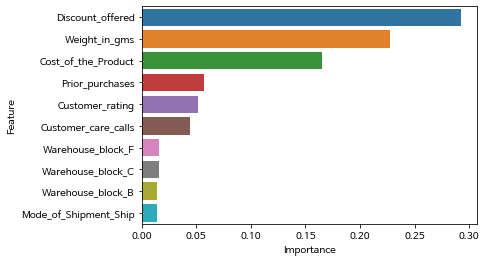

In [ ]:
feat = X.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

In [ ]:

trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

##### RFE(Recursive Feature Elimination) 적용

In [ ]:
rfe = RFE(rf, 6)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)
#Fitting the data to model
rf.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False False False False False
 False False False False False False False]
[ 1  1  1  1  1  1  8  7  6 10  4 11 12  5 14  3  9  2 13]


##### SelectKBest 적용 후 평가

In [ ]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_new_train, y_new_train)
y_pred = rf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.6493939393939394


#### 4) XGBoost

##### 모델 생성

In [ ]:
###### 코드 작성 부분 시작 ######
# xgmodel =
# fitting..
# y_pred =
###### 코드 작성 부분 마침 ######

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.6857575757575758


##### RFE(Recursive Feature Elimination) 적용

In [ ]:
rfe = RFE(xgmodel, 6)
X_rfe = rfe.fit_transform(X,Y)
xgmodel.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True False  True False False False  True
 False False False False False False False]
[ 5  8  1  1  1  1 11  1 13  2 12  1  7  4  6  3 10  9 14]


##### SelectKBest 적용 후 평가

In [ ]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

xgmodel=XGBClassifier()
xgmodel.fit(X_new_train,y_new_train)
y_pred = xgmodel.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.6812121212121212


## 04. 군집 분석

#### 군집 분석을 활용한 고객 Segmentation

#### 1) K-Means Clustering

##### Elbow 방법 적용

In [ ]:
clustdata=train_final[(train_final.Reached_on_Time_Y_N == 1)]

In [ ]:
wcss=[]

for i in range(1,15):
    ###### 코드 작성 부분 시작 ######
    # init='k-means++', random_state=0
    # kmeans =
    # fitiing..
    ###### 코드 작성 부분 마침 ######
    wcss.append(kmeans.inertia_)

WCSS는 클러스터의 각 구성원과 중심 사이의 거리 제곱의 합

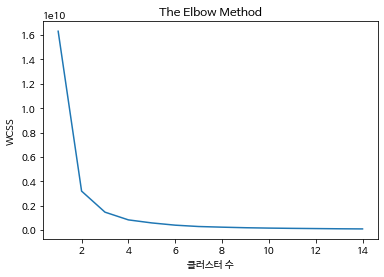

In [ ]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
c = km.fit_predict(clustdata)
c

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
clustdata["Cluster"]= c
clustdata.head()

,Reached_on_Time_Y_N,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Cluster
0,1,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1,0
2,1,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1,1
3,1,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,1,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0,0


In [ ]:
clustdata.groupby(['Cluster']).mean()

,Reached_on_Time_Y_N,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Cluster,,,,,,,,,,,,,,,,,,,,
0,1.0,4.155969,2.991302,206.317037,3.637373,25.936713,1881.134673,0.164967,0.169166,0.166467,0.164367,0.335033,0.156269,0.158668,0.685063,0.078584,0.511998,0.409418,0.511398,0.488602
1,1.0,3.821617,3.020749,208.292970,3.354289,11.154227,4709.394240,0.162589,0.167234,0.166925,0.169712,0.333540,0.169712,0.156705,0.673583,0.109631,0.443791,0.446578,0.492722,0.507278


##### 군집화된 데이터 Scailing

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustdata)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

##### PCA 적용 (n=2)

In [ ]:
###### 코드 작성 부분 시작 ######
# n_components = 2

# pca =
# fit_transform..
###### 코드 작성 부분 마침 ######
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [ ]:
c1 = km.fit_predict(X_principal)
c1

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c1, index=result.index)
result.head()

,P1,P2,Cluster
0,-0.511925,-0.227331,0
1,-0.314700,0.373613,1
2,-0.002647,0.293440,1
3,-0.107671,0.220561,1
4,-0.194889,-0.368057,0


##### 주성분-클러스터 그래프

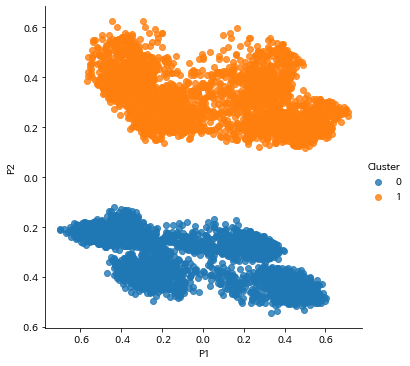

In [ ]:
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster',
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
result['Cluster'].value_counts()

0    3296
1    3267
Name: Cluster, dtype: int64

##### PCA 후 Elbow 방법 적용

In [ ]:
wcss=[]

for i in range(2,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

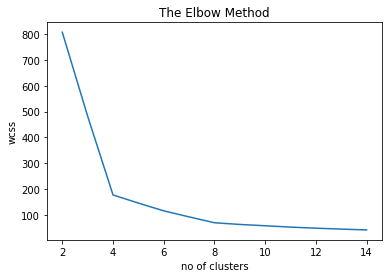

In [ ]:
plt.plot(range(2,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)
c = km.fit_predict(X_principal)
c

array([0, 3, 3, ..., 0, 3, 0], dtype=int32)

In [ ]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c, index=result.index)
result.head()

,P1,P2,Cluster
0,-0.511925,-0.227331,0
1,-0.314700,0.373613,3
2,-0.002647,0.293440,3
3,-0.107671,0.220561,3
4,-0.194889,-0.368057,0


##### 새로운 주성분-클러스터 그래프

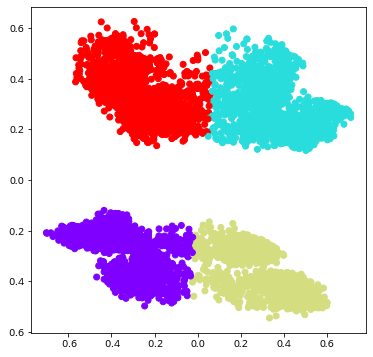

In [ ]:
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(result.iloc[:,0],result.iloc[:,1],c=result['Cluster'], cmap ='rainbow')
plt.show()

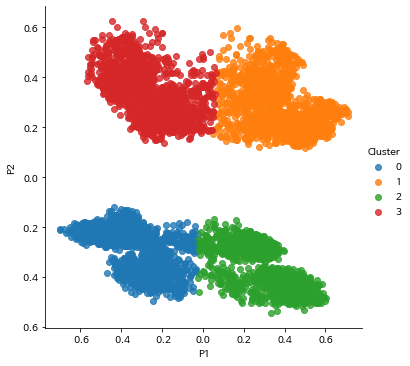

In [ ]:
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster',
                   fit_reg=False, legend=True, legend_out=True)